In [55]:
import requests
import re
from bs4 import BeautifulSoup
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
from textblob import TextBlob

In [2]:
url1 = 'https://www.upsocl.com/cat/comunidad/'
url2 = 'https://www.upsocl.com/'
url3 = 'https://www.upsocl.com/sabores/'

In [3]:
response = requests.get(url1)
soup = BeautifulSoup(response.text,"html.parser")
titulares_comunidad = soup.find("div", {'class': 'hfeed'})
titular_comunidad = titulares_comunidad.find_all("h2", {'class':'entry-title'})
titular_comunidad = [titulo.text for titulo in titular_comunidad]


response = requests.get(url2)
soup = BeautifulSoup(response.text,"html.parser")
portada_container = soup.find("div", {'id': 'container'})
portadas = portada_container.find_all("h2", {'class':'entry-title'})
portadas = [portada.text for portada in portadas]


response = requests.get(url3)
soup = BeautifulSoup(response.text,"html.parser")
titulares_sabores = soup.find("div", {'class': 'hfeed'})
titular_sabores = titulares_sabores.find_all("h2", {'class':'entry-title'})
titular_sabores = [titulo.text for titulo in titular_sabores]



In [4]:
scrapping = portadas + titular_comunidad + titular_sabores
print(scrapping[0:10])

['¿Cuánto se conocen madre e hija?', 'Sólo puede haber un ganador.', 'Nadie dijo que sería fácil…', 'Ya no querrás verlos. 16 caricaturas de tu infancia transformadas en terroríficos monstruos', 'Profesor enseña matemáticas al ritmo del rap. Estudiantes cantaron y bailaron con los tipos de ángulos', '30 esculturas tan perfectas que llegan a dar miedo. No, no es una mujer real', 'Pollo al limón con salsa de palta', 'Panes rellenos como fajitas', 'Prueba los deliciosos rolls de jamón y queso', 'Revelan detalles de la 2da temporada de «You». Estará centrada en el oscuro pasado del lunático Joe']


In [5]:
scrap = pd.DataFrame(data=scrapping, columns=['Titulares'])
scrap.head(10)

,Titulares
0,¿Cuánto se conocen madre e hija?
1,Sólo puede haber un ganador.
2,Nadie dijo que sería fácil…
3,Ya no querrás verlos. 16 caricaturas de tu inf...
4,Profesor enseña matemáticas al ritmo del rap. ...
5,30 esculturas tan perfectas que llegan a dar m...
6,Pollo al limón con salsa de palta
7,Panes rellenos como fajitas
8,Prueba los deliciosos rolls de jamón y queso
9,Revelan detalles de la 2da temporada de «You»....


In [6]:
dfkaggle = pd.read_csv('./clickBait_Data.csv')
dfkaggle.head(5)

,index,id,titles,clickbait
0,6574,6575,25 Things We Learned From Julia Louis-Dreyfus ...,1
1,39655,39656,John Brennan: Trump's 'Nazi Germany' tweet to ...,0
2,44513,44514,"TruthRevolt.org: ISIS Stands For ""Israeli Secr...",0
3,44205,44206,Peak Millennial? Cities Cant Assume a Continue...,0
4,11106,11107,This Entire City Is Made Out Of Ice And It Wil...,1


In [7]:
dfkaggle = dfkaggle.drop(columns =['index','id','clickbait'])

In [8]:
dfkaggle.head(5)

,titles
0,25 Things We Learned From Julia Louis-Dreyfus ...
1,John Brennan: Trump's 'Nazi Germany' tweet to ...
2,"TruthRevolt.org: ISIS Stands For ""Israeli Secr..."
3,Peak Millennial? Cities Cant Assume a Continue...
4,This Entire City Is Made Out Of Ice And It Wil...


In [9]:
from googletrans import Translator

def translate_es(sentence):
    try:
        translator= Translator()
        translation = translator.translate(sentence, dest='es')
        return translation.text
    except:
        return print('Se ha llegado al limite')
    

#traduccion = translate_es('Hello my name is Marina')
#print(traduccion)

In [10]:
dfkaggle2 = dfkaggle.iloc[0:200]

In [11]:
dfkaggle2.shape

(200, 1)

In [12]:
#Danger!!!! lleva un tiempo usarlo y tiene un límite
#dfkaggle2['spanish'] = dfkaggle2['titles'].apply(translate_es)

In [13]:
dfkaggle2.head(5)

,titles
0,25 Things We Learned From Julia Louis-Dreyfus ...
1,John Brennan: Trump's 'Nazi Germany' tweet to ...
2,"TruthRevolt.org: ISIS Stands For ""Israeli Secr..."
3,Peak Millennial? Cities Cant Assume a Continue...
4,This Entire City Is Made Out Of Ice And It Wil...


In [14]:
dfkaggle_es = dfkaggle2

In [15]:
dfkaggle_es = dfkaggle_es.drop(columns =['titles'])

In [16]:
dfkaggle_es.head(5)

""
0
1
2
3
4


In [17]:
dfkaggle_es.to_csv(r'kaggle_traducido2.csv')

In [18]:
#Usar esto en caso de emergencia!!! Limite de traducciones alcanzado
dfkaggle_es = pd.read_csv('kaggle_traducido.csv')

In [19]:
dfkaggle_es = dfkaggle_es.rename(columns = {'spanish':'Titulares'})

In [20]:
clickbait = pd.concat([scrap,dfkaggle_es],sort=False)

In [21]:
clickbait.head(5)

,Titulares,Unnamed: 0
0,¿Cuánto se conocen madre e hija?,NaN
1,Sólo puede haber un ganador.,NaN
2,Nadie dijo que sería fácil…,NaN
3,Ya no querrás verlos. 16 caricaturas de tu inf...,NaN
4,Profesor enseña matemáticas al ritmo del rap. ...,NaN


In [22]:
clickbait['Titulares'] = clickbait['Titulares'].str.replace(r'[^\w\s]','')
clickbait.head(5)

,Titulares,Unnamed: 0
0,Cuánto se conocen madre e hija,NaN
1,Sólo puede haber un ganador,NaN
2,Nadie dijo que sería fácil,NaN
3,Ya no querrás verlos 16 caricaturas de tu infa...,NaN
4,Profesor enseña matemáticas al ritmo del rap E...,NaN


In [23]:
clickbait = clickbait.drop(columns = ['Unnamed: 0'])

In [24]:
clickbait.head(5)

,Titulares
0,Cuánto se conocen madre e hija
1,Sólo puede haber un ganador
2,Nadie dijo que sería fácil
3,Ya no querrás verlos 16 caricaturas de tu infa...
4,Profesor enseña matemáticas al ritmo del rap E...


In [25]:
clickbait['Titulares'] = clickbait['Titulares'].apply(lambda scrapping: nltk.word_tokenize(scrapping))
clickbait.head()

,Titulares
0,"[Cuánto, se, conocen, madre, e, hija]"
1,"[Sólo, puede, haber, un, ganador]"
2,"[Nadie, dijo, que, sería, fácil]"
3,"[Ya, no, querrás, verlos, 16, caricaturas, de,..."
4,"[Profesor, enseña, matemáticas, al, ritmo, del..."


In [26]:
clickbait['word_count'] = clickbait['Titulares'].apply(len)
clickbait.head()

,Titulares,word_count
0,"[Cuánto, se, conocen, madre, e, hija]",6
1,"[Sólo, puede, haber, un, ganador]",5
2,"[Nadie, dijo, que, sería, fácil]",5
3,"[Ya, no, querrás, verlos, 16, caricaturas, de,...",13
4,"[Profesor, enseña, matemáticas, al, ritmo, del...",16


In [27]:
clickbait['char_len'] = clickbait['Titulares'].apply(lambda comment: sum(len(word) for word in comment))
clickbait.head()

,Titulares,word_count,char_len
0,"[Cuánto, se, conocen, madre, e, hija]",6,25
1,"[Sólo, puede, haber, un, ganador]",5,23
2,"[Nadie, dijo, que, sería, fácil]",5,22
3,"[Ya, no, querrás, verlos, 16, caricaturas, de,...",13,78
4,"[Profesor, enseña, matemáticas, al, ritmo, del...",16,86


In [46]:
from nltk.corpus import stopwords
stop = stopwords.words('spanish')
clickbait['stopwords'] = clickbait['Titulares'].apply(lambda comment: len([word for word in comment if word in stop]))
clickbait.head()

,Titulares,word_count,char_len,stopwords
0,"[cuánto, conocen, madre, hija]",6,25,0
1,"[haber, ganador]",5,23,0
2,"[nadie, dijo, fácil]",5,22,0
3,"[querrás, verlos, 16, caricaturas, infancia, t...",13,78,0
4,"[profesor, enseña, matemáticas, ritmo, rap, es...",16,86,0


In [37]:
clickbait['Titulares'] = clickbait['Titulares'].apply(lambda comment: [word for word in comment if word not in stop])
clickbait.head()

,Titulares,word_count,char_len,stopwords
0,"[cuánto, conocen, madre, hija]",6,25,2
1,"[sólo, haber, ganador]",5,23,1
2,"[nadie, dijo, fácil]",5,22,2
3,"[querrás, verlos, 16, caricaturas, infancia, t...",13,78,4
4,"[profesor, enseña, matemáticas, ritmo, rap, es...",16,86,6


In [38]:
clickbait['Titulares'] = clickbait['Titulares'].apply(lambda comment: [word.lower() for word in comment])
clickbait.head()

,Titulares,word_count,char_len,stopwords
0,"[cuánto, conocen, madre, hija]",6,25,2
1,"[sólo, haber, ganador]",5,23,1
2,"[nadie, dijo, fácil]",5,22,2
3,"[querrás, verlos, 16, caricaturas, infancia, t...",13,78,4
4,"[profesor, enseña, matemáticas, ritmo, rap, es...",16,86,6


In [39]:
freq = pd.Series(' '.join(" ".join(comment) for comment in clickbait['Titulares']).split(" ")).value_counts()[:10]
freq

mejor      10
sólo       10
5           9
real        9
después     9
hombre      9
ser         8
15          8
ahora       8
estudio     8
dtype: int64

In [40]:
freq_list = list(freq.index)
clickbait['Titulares'] = clickbait['Titulares'].apply(lambda comment: [word for word in comment if word not in freq_list])
clickbait.head()

,Titulares,word_count,char_len,stopwords
0,"[cuánto, conocen, madre, hija]",6,25,2
1,"[haber, ganador]",5,23,1
2,"[nadie, dijo, fácil]",5,22,2
3,"[querrás, verlos, 16, caricaturas, infancia, t...",13,78,4
4,"[profesor, enseña, matemáticas, ritmo, rap, es...",16,86,6


In [41]:
less_freq = pd.Series(' '.join(" ".join(comment) for comment in clickbait['Titulares']).split(" ")).value_counts()[-10:]
less_freq

documentos       1
entradas         1
absolutamente    1
howard           1
relato           1
envió            1
jackson          1
priyanka         1
corazón          1
pratt            1
dtype: int64

In [42]:
less_freq_list = list(less_freq.index)
clickbait['Titulares'] = clickbait['Titulares'].apply(lambda comment: [word for word in comment if word not in less_freq_list])
clickbait.head()

,Titulares,word_count,char_len,stopwords
0,"[cuánto, conocen, madre, hija]",6,25,2
1,"[haber, ganador]",5,23,1
2,"[nadie, dijo, fácil]",5,22,2
3,"[querrás, verlos, 16, caricaturas, infancia, t...",13,78,4
4,"[profesor, enseña, matemáticas, ritmo, rap, es...",16,86,6


In [35]:
#clickbait.to_csv('titulares.csv')

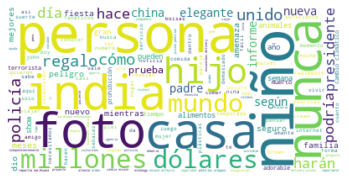

In [63]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=70, background_color="White").generate(" ".join(" ".join(comment) for comment in clickbait['Titulares']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")


plt.savefig('nube.png')
plt.show()
#plt.to_file('N.png')